In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [63]:
np.random.seed(2343243)

In [64]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [65]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

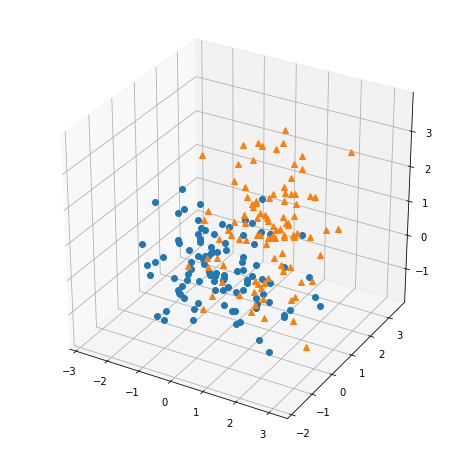

In [66]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot(class1[:,0], class1[:,1], class1[:,2], 'o')
ax.plot(class2[:,0], class2[:,1], class2[:,2], '^')
plt.show()

In [67]:
all_data = np.concatenate((class1, class2))

In [68]:
pca = PCA(n_components = 2)
transform_data = pca.fit_transform(all_data)
transform_data

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [69]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

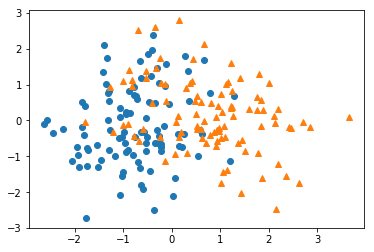

In [70]:
plt.plot(transform_data[0:100, 0], transform_data[0:100,1],"o")
plt.plot(transform_data[100:200, 0], transform_data[100:200,1],"^")
plt.show()

In [71]:
all_data

array([[-3.25140356e-01,  2.26100653e-01,  4.84699672e-01],
       [ 1.05384813e+00, -1.30524130e+00,  7.35900502e-01],
       [ 3.85510947e-01,  2.67225704e-01, -1.20438011e+00],
       [ 2.25670142e+00,  9.41725294e-01, -3.72841804e-02],
       [-9.56036843e-01, -1.99950875e-01, -5.79951446e-01],
       [-1.36879306e+00,  2.65693862e-01,  3.15358073e-01],
       [-3.57904124e-01, -3.01586297e-01,  1.51646574e+00],
       [-2.62307746e-01, -1.49967212e-01,  4.48120214e-01],
       [ 1.25348197e+00, -7.99130590e-02, -4.04439378e-01],
       [-3.59318491e-02, -1.88816824e-01,  6.33179474e-01],
       [ 1.73265824e-01,  1.55594386e+00,  3.10004238e-02],
       [ 5.99328145e-03, -5.57733922e-01,  1.47126252e+00],
       [ 3.25434492e-01, -5.47925288e-01,  3.22656145e-01],
       [-2.61152737e-01,  3.00735544e-01, -3.62332956e-01],
       [-1.49620041e-02, -1.28943224e+00,  5.85885478e-01],
       [-4.70235174e-01,  3.64319305e-01, -4.48022818e-01],
       [-1.39281759e+00, -1.03334488e+00

In [72]:
all_data_t = all_data.T
cov = np.cov(all_data_t)
cov.shape

(3, 3)

In [73]:
cov

array([[1.14139998, 0.1061989 , 0.0918139 ],
       [0.1061989 , 1.11579657, 0.27166986],
       [0.0918139 , 0.27166986, 1.11826602]])

In [74]:
#finding the eigen values and eigen vectors
np.linalg.eig(cov)
#first array is eigen values and second array is eigen vectors
#eigen vectors exist columnwise

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

In [75]:
#Eigen values are not necessarily sorted 
#so we need to sort them to pick 
#top k eigen values/vectors
eig_val, eig_vectors = np.linalg.eig(cov)

In [76]:
#To do so, we create another array and go through
#each eigen value one by one
eig_val_vector_pair = []
for i in range(len(eig_val)):
    eig_vec = eig_vectors[:,i]
    eig_val_vector_pair.append((eig_val[i], eig_vec))
eig_val_vector_pair.sort(reverse = True)
eig_val_vector_pair

[(1.4518653417359286, array([0.41124564, 0.64810013, 0.64097055])),
 (1.0786611401978583, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.8449360955327045, array([ 0.0402454 , -0.71540934,  0.69754554]))]

In [77]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

In [78]:
pca.explained_variance_

array([1.45186534, 1.07866114])